#Real Phones Random Foreest

##Set up

In [ ]:
use_grid_search = False

use_mean = True
use_median = False

In [ ]:
# use_mean = False
# use_median = False
# choice = ''
# while choice not in ['1', '2', '3']:
#   print('1. Use mean')
#   print('2. Use median')
#   print('3. Use mode')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_mean = True
# elif choice == '2':
#   use_median = True

# choice = ''
# while choice not in ['1', '2']:
#   print('1. Use Grid Search')
#   print('2. Use Default Parameters')
#   choice = input('Enter your choice:')

# if choice == '1':
#   use_grid_search = True
# else:
#   use_grid_search = False

##Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder, LabelEncoder
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Dataset

In [ ]:
data = pd.read_csv('smartphones.csv')

data.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [ ]:
data.shape

(980, 22)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [ ]:
data.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [ ]:
for col in data.columns:
  print(data[col].value_counts())
  print()

brand_name
xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
nokia         13
honor         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
jio            4
lava           4
redmi          3
lg             3
oukitel        3
letv           3
micromax       3
ikall          3
gionee         3
zte            2
royole         2
lyf            2
lenovo         2
doogee         2
blackview      1
cat            1
cola           1
duoqin         1
blu            1
leitz          1
leeco          1
sharp          1
tcl            1
tesla          1
vertu          1
Name: count, dtype: int64

model
ZTE Axon 40 Ultra 5G               1
Apple iPhone 11                    1
Apple iPhone 11 (128GB)            1
Apple iPhone 11 Pro Max            1
Xiaomi Redmi Note 12 Pro M

Looking for null values

In [ ]:
data.isnull().sum()

,0
brand_name,0
model,0
price,0
avg_rating,101
5G_or_not,0
processor_brand,20
num_cores,6
processor_speed,42
battery_capacity,11
fast_charging_available,0


Looking for duplicates

In [ ]:
data.duplicated().sum()

np.int64(0)

##Cleaning


In [ ]:
cleaned = data.copy()

###Filling in missing string values with "Not Defined" and numerical values with either mean, mode or median

In [ ]:
cleaned.isnull().sum()

,0
brand_name,0
model,0
price,0
avg_rating,101
5G_or_not,0
processor_brand,20
num_cores,6
processor_speed,42
battery_capacity,11
fast_charging_available,0


In [ ]:
for col in cleaned.columns:
  if cleaned.dtypes[col] == 'object':
    cleaned[col] = cleaned[col].fillna(value = "Not Defined")
  elif use_mean:
    cleaned[col] = cleaned[col].fillna(cleaned[col].mean())
  elif use_median:
    cleaned[col] = cleaned[col].fillna(cleaned[col].median())
  else:
    cleaned[col] = cleaned[col].fillna(cleaned[col].mode()[0])

Rechecking nulls

In [ ]:
cleaned.isnull().sum()

,0
brand_name,0
model,0
price,0
avg_rating,0
5G_or_not,0
processor_brand,0
num_cores,0
processor_speed,0
battery_capacity,0
fast_charging_available,0


Rechecking duplicates

In [ ]:
cleaned.duplicated().sum()

np.int64(0)

###Anomally handling

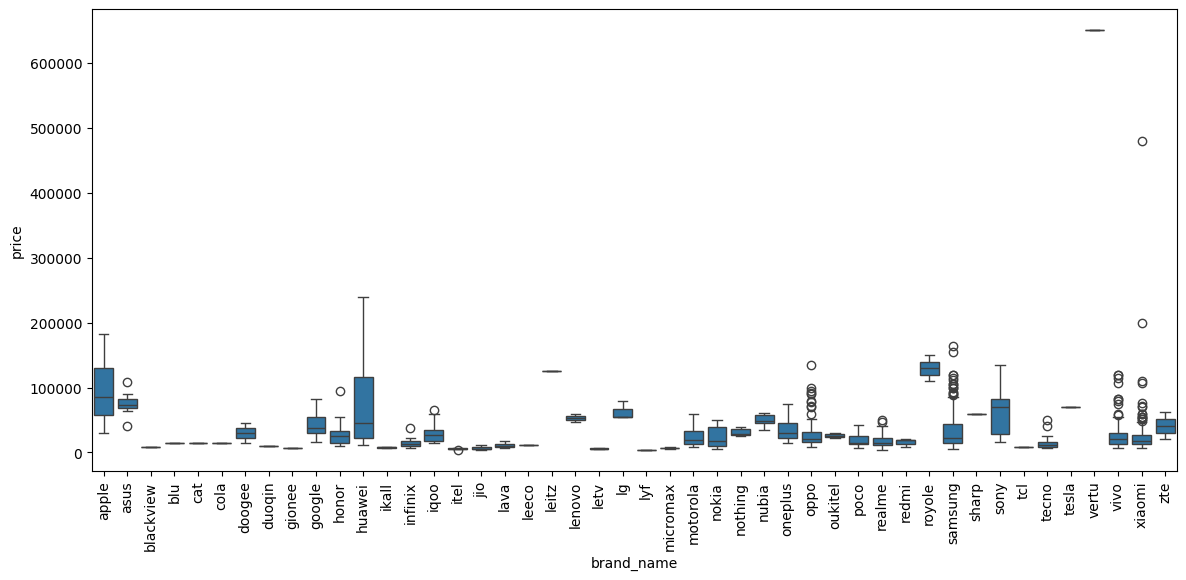

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x=cleaned['brand_name'], y=cleaned['price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# cleaned.drop(cleaned[cleaned['price'] > 200000].index, inplace=True)

In [ ]:
Q1 = cleaned['price'].quantile(0.25)
Q3 = cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

cleaned.drop(cleaned[cleaned['price'] > (Q3 + 1.5 * IQR)].index, inplace=True)
cleaned.drop(cleaned[cleaned['price'] < (Q1 - 1.5 * IQR)].index, inplace=True)

Q1: 12999.0
Q3: 35491.5
IQR: 22492.5
Lower bound: -20739.75
Upper bound: 69230.25


##Preparing data for modelling

###Dropping columns

In [ ]:
cleaned.drop('model', inplace=True, axis=1) #because it is unique
cleaned.drop('fast_charging', axis=1, inplace = True) #Many missing values, so dropped

###Scaling Numerical Data

In [ ]:
for col in cleaned.columns:
  if cleaned.dtypes[col] == 'object':
    continue
  if col == 'price':
    price_scaler = StandardScaler()
    cleaned[col] = price_scaler.fit_transform(cleaned[col].values.reshape(-1,1))
    continue
  scaler = StandardScaler()
  cleaned[col] = scaler.fit_transform(cleaned[col].values.reshape(-1,1))

In [ ]:
cleaned.head()

,brand_name,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,1.194146,-0.693494,-1.040929,bionic,-2.169421,0.660805,-1.711367,-2.317814,-0.890621,-0.900269,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,-0.735217,-0.781904
1,apple,1.772763,-0.412994,-1.040929,bionic,-2.169421,0.660805,-1.711367,-2.317814,-0.890621,0.105245,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,-0.735217,-0.781904
3,apple,2.134398,-0.553244,0.960681,bionic,-2.169421,1.707232,-0.045916,-2.317814,-0.890621,-0.900269,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,0.759982,0.477197
4,apple,2.423706,-0.412994,0.960681,bionic,-2.169421,1.707232,-0.045916,-2.317814,-0.890621,0.105245,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,0.759982,0.477197
5,apple,3.291631,-0.272744,0.960681,bionic,-2.169421,1.707232,-0.045916,-2.317814,-0.890621,2.116273,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,0.759982,0.477197


###Encoding Strings

In [ ]:
string_cols = []
for col in cleaned.columns:
  if cleaned.dtypes[col] == 'object':
    string_cols.append(col)
    print(col)

cleaned.head()

brand_name
processor_brand
os


,brand_name,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,1.194146,-0.693494,-1.040929,bionic,-2.169421,0.660805,-1.711367,-2.317814,-0.890621,-0.900269,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,-0.735217,-0.781904
1,apple,1.772763,-0.412994,-1.040929,bionic,-2.169421,0.660805,-1.711367,-2.317814,-0.890621,0.105245,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,-0.735217,-0.781904
3,apple,2.134398,-0.553244,0.960681,bionic,-2.169421,1.707232,-0.045916,-2.317814,-0.890621,-0.900269,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,0.759982,0.477197
4,apple,2.423706,-0.412994,0.960681,bionic,-2.169421,1.707232,-0.045916,-2.317814,-0.890621,0.105245,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,0.759982,0.477197
5,apple,3.291631,-0.272744,0.960681,bionic,-2.169421,1.707232,-0.045916,-2.317814,-0.890621,2.116273,-1.346841,-1.091133,-0.999973,ios,-1.181535,-0.405616,-1.486458,0.759982,0.477197


In [ ]:
# for col in string_cols:

  # encoder = OneHotEncoder(sparse_output=False)
  # encoder.fit(cleaned[col].values.reshape(-1,1))
  # encoded = encoder.transform(cleaned[col].values.reshape(-1,1))
  # encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]))

  # cleaned = cleaned.drop(columns=col)
  # cleaned = pd.concat([cleaned, encoded_df], axis=1)

for col in string_cols:
    encoder = TargetEncoder(target_type="continuous", random_state=42, smooth = 5)
    # encoder = LabelEncoder()
    X = cleaned[col].values.reshape(-1, 1)
    encoder.fit(X, cleaned['price'])
    # encoder.fit(cleaned[col])
    cleaned[col] = encoder.transform(X)

In [ ]:
cleaned.columns

Index(['brand_name', 'price', 'avg_rating', '5G_or_not', 'processor_brand',
       'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras', 'os',
       'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

In [ ]:
cleaned.isnull().sum()

,0
brand_name,0
price,0
avg_rating,0
5G_or_not,0
processor_brand,0
num_cores,0
processor_speed,0
battery_capacity,0
fast_charging_available,0
ram_capacity,0


##Building Model

###Loading X and y

In [ ]:
X = cleaned.drop('price', axis=1)
y = cleaned['price']

In [ ]:
print(X.shape)
print(y.shape)

(873, 19)
(873,)


###Feature Selection

In [ ]:
# sfm = SelectFromModel(RandomForestRegressor(), threshold="median")
# sfm.fit(X, y)

# X_new = sfm.transform(X)

Looking at features ranked and the ones selected.

In [ ]:
# importances = sfm.estimator_.feature_importances_
# feature_scores = pd.DataFrame({
#     'Feature': X.columns,
#       'Importance': importances
# }).sort_values(by='Importance', ascending = False),

# print(feature_scores)

# # Get the indices of the selected features
# selected_feature_indices = sfm.get_support(indices=True)

# # Get the names of the selected features
# selected_feature_names = X.columns[selected_feature_indices]

# print("Selected Features:", selected_feature_names)

In [ ]:
# X = X_new

###Splitting up training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(698, 19)
(175, 19)
(698,)
(175,)


###Finding best parameters

In [ ]:
if use_grid_search:
  param_grid = {
      'max_depth': [50, 100, 150, 200],
      'max_features': ['sqrt', 'log2'],
      'min_samples_split': [2, 5, 10],
      'min_samples_leaf': [1, 2, 4],
      'bootstrap': [False],
      'max_leaf_nodes': [50, 100, 150, 200],
      'n_estimators': [100, 150, 200, 250],
      'random_state': [42]
  }

In [ ]:
if use_grid_search:
  grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=3, cv = 3)


In [ ]:
if use_grid_search:
  grid_search.fit(X_train, y_train)

In [ ]:
if use_grid_search:
  print(grid_search.best_params_)

###Building Random Forest Model

In [ ]:
if use_grid_search:
  model = RandomForestRegressor(**grid_search.best_params_)
else:
  # model = RandomForestRegressor(max_depth = 50, max_features =  'sqrt', min_samples_leaf = 1, min_samples_split = 2, bootstrap= False, max_leaf_nodes=200, n_estimators = 150, random_state = 42)
  model = RandomForestRegressor(max_depth = 50, max_features =  'sqrt', min_samples_leaf = 1, min_samples_split = 2, bootstrap= False, max_leaf_nodes=200, n_estimators = 150, random_state = 42)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      max_leaf_nodes=200, n_estimators=150, random_state=42)

##Testing Model

In [ ]:
print(f'Train Accuracy: {model.score(X_train, y_train):.3f}')
print(f'Test Accuracy:  {model.score(X_test, y_test):.3f}')

Train Accuracy: 0.992
Test Accuracy:  0.874


In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

y_pred = price_scaler.inverse_transform(y_pred.reshape(-1,1))
y_test = price_scaler.inverse_transform(y_test.values.reshape(-1,1))

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred):.2f}')

Mean Absolute Error: 3005.16
Mean Absolute Percentage Error: 0.14


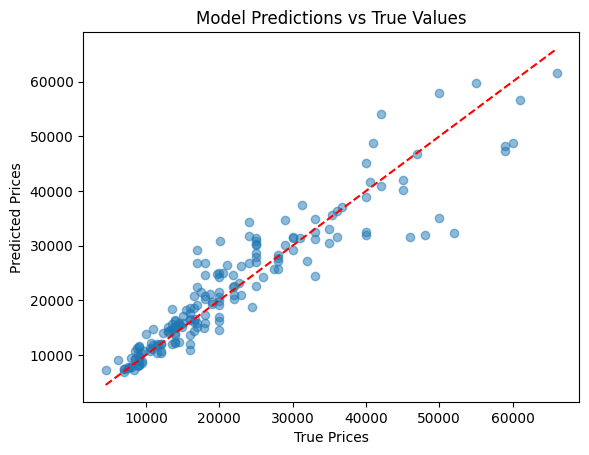

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Model Predictions vs True Values")
plt.show()